<a href="https://colab.research.google.com/github/emms204/FREE-AI-Classes-In-Every-City-Hackathon/blob/main/FreeAIClasses_Hackathon2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [ ]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

In [ ]:
Train = pd.read_csv('/content/Train.csv')
Test = pd.read_csv('/content/Test.csv')
SampleSub = pd.read_csv('/content/SampleSubmission.csv')
Var_def = pd.read_csv('/content/VariableDefinitions.csv')

In [ ]:
pd.set_option('display.max_colwidth',200)
Var_def

,VehicleID,This is the unique identifier of the car.
0,Location,This is the location in Nigeria where the seller is based.
1,Maker,This is the manufacturer of the car. It is the brand name.
2,Model,This is the the name of the car product within a range of similar car products.
3,Year,This is the year the car was manufactured.
4,Colour,This is the colour of the car.
5,Amount (Million Naira),This is the selling price of the car. It is the amount the company will sell the car.
6,Type,"This is the nature of previous use of the car, whether it was previously used within Nigeria or outside Nigeria."
7,Distance,This is the mileage of the car. It is how much distance it covered in its previous use


In [ ]:
Train

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.20,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.50,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.20,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.80,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.60,Nigerian Used,"125,206"
...,...,...,...,...,...,...,...,...,...
7200,VHL14329,Abuja,Honda,Civic,"2,018",Gray,5.70,Foreign Used,"65,000"
7201,VHL10637,Abuja,BMW,X3,"2,007",White,4.00,Nigerian Used,"200,000"
7202,VHL19734,Abuja,Toyota,RAV4 2.5 Limited 4x4,"2,010",Black,2.85,Nigerian Used,NaN
7203,VHL15569,Lagos,Mercedes-Benz,GLK-Class 350,"2,012",Black,8.65,Foreign Used,"85,750"


In [ ]:
Test

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance
0,VHL18518,Abuja,BMW,323i,"2,008",White,Foreign Used,30524.0
1,VHL17149,Lagos,Toyota,Camry,"2,013",White,Foreign Used,NaN
2,VHL10927,Lagos,Toyota,Highlander Limited V6,"2,005",Gold,Foreign Used,NaN
3,VHL12909,Lagos,Toyota,Camry,"2,011",Gray,Foreign Used,166839.0
4,VHL12348,Lagos,Lexus,ES 350 FWD,"2,013",Red,Foreign Used,88862.0
...,...,...,...,...,...,...,...,...
2056,VHL17903,Abuja,Toyota,Avalon,"2,020",Red,Foreign Used,2650.0
2057,VHL14018,Ibadan,Audi,Q5,"2,011",Blue,Foreign Used,99000.0
2058,VHL17473,Ibadan,Toyota,Camry,"2,015",Black,Foreign Used,108000.0
2059,VHL11480,Abuja,Lexus,IS 350 AWD,"2,013",White,Foreign Used,52485.0


In [ ]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7184 non-null   object 
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7188 non-null   float64
 7   Type                    7008 non-null   object 
 8   Distance                4845 non-null   object 
dtypes: float64(1), object(8)
memory usage: 506.7+ KB


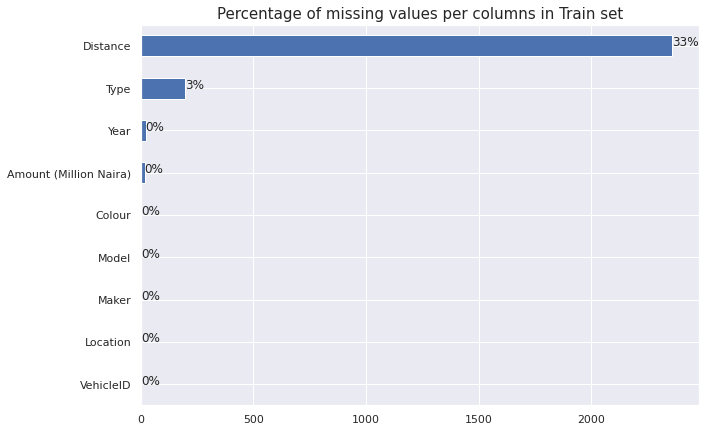

In [ ]:
ax = Train.isna().sum().sort_values().plot(kind='barh', figsize=(10,7))
plt.title('Percentage of missing values per columns in Train set', fontdict={'size':15})
for p in ax.patches:
  percentage = '{:,.0f}%'.format((p.get_width()/Train.shape[0])*100)
  width, height = p.get_width(), p.get_height()
  x = p.get_x()+width+0.2
  y = p.get_y()+height/2
  ax.annotate(percentage,(x,y))

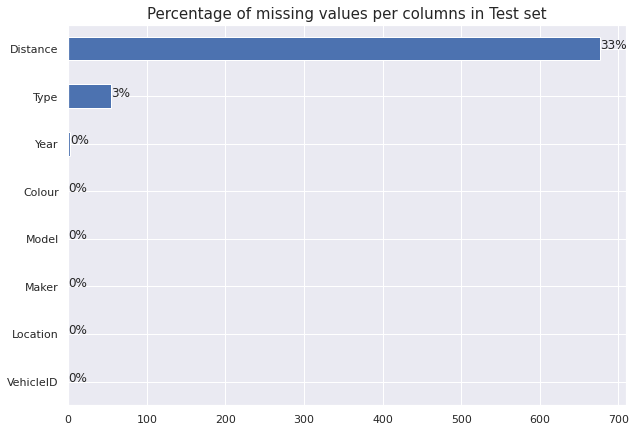

In [ ]:
ax = Test.isna().sum().sort_values().plot(kind='barh', figsize=(10,7))
plt.title('Percentage of missing values per columns in Test set', fontdict={'size':15})
for p in ax.patches:
  percentage = '{:,.0f}%'.format((p.get_width()/Test.shape[0])*100)
  width, height = p.get_width(), p.get_height()
  x = p.get_x()+width+0.2
  y = p.get_y()+height/2
  ax.annotate(percentage,(x,y))

In [ ]:
Train['Amount (Million Naira)'] = Train['Amount (Million Naira)'].fillna(Train['Amount (Million Naira)'].median())

###Preprocessing

In [ ]:
Train['tag'] = 'Train'
Test['tag'] = 'Test'
data = pd.concat([Train,Test]).reset_index(drop=True)
data

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance,tag
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN,Train
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000",Train
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852",Train
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000",Train
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206",Train
...,...,...,...,...,...,...,...,...,...,...
9261,VHL17903,Abuja,Toyota,Avalon,"2,020",Red,NaN,Foreign Used,2650.0,Test
9262,VHL14018,Ibadan,Audi,Q5,"2,011",Blue,NaN,Foreign Used,99000.0,Test
9263,VHL17473,Ibadan,Toyota,Camry,"2,015",Black,NaN,Foreign Used,108000.0,Test
9264,VHL11480,Abuja,Lexus,IS 350 AWD,"2,013",White,NaN,Foreign Used,52485.0,Test


In [ ]:
data[['Type', 'Distance','Year']].isna().sum()

Type         251
Distance    3036
Year          23
dtype: int64

In [ ]:
missing_cols = data[['Type', 'Distance','Year']].copy()
missing_cols[['Distance','Year']] = missing_cols[['Distance','Year']].astype('str')

In [ ]:
missing_cols['Year'] = missing_cols['Year'].apply(lambda x:x.replace(',',''))
missing_cols['Distance'] = missing_cols['Distance'].apply(lambda x:x.replace(',',''))

In [ ]:
missing_cols[['Year','Distance']] = missing_cols[['Year','Distance']].astype('float')

In [ ]:
missing_cols

,Type,Distance,Year
0,Nigerian Used,NaN,2011.0
1,Nigerian Used,125000.0,2012.0
2,Foreign Used,110852.0,2010.0
3,Foreign Used,30000.0,2017.0
4,Nigerian Used,125206.0,2002.0
...,...,...,...
9261,Foreign Used,2650.0,2020.0
9262,Foreign Used,99000.0,2011.0
9263,Foreign Used,108000.0,2015.0
9264,Foreign Used,52485.0,2013.0


In [ ]:
missing_cols['Type'].value_counts()

Foreign Used     6286
Nigerian Used    2442
Brand New         287
Name: Type, dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
missing_cols['Type'] = imp.fit_transform(missing_cols[['Type']])

In [ ]:
imp = SimpleImputer(strategy='mean')
missing_cols['Distance'] = imp.fit_transform(missing_cols[['Distance']])

In [ ]:
imp = SimpleImputer(strategy='most_frequent')
missing_cols['Year'] = imp.fit_transform(missing_cols[['Year']])

In [ ]:
data[['Type', 'Distance','Year']] = missing_cols

In [ ]:
data.describe()

,Year,Amount (Million Naira),Distance
count,9266.000000,7205.000000,9.266000e+03
mean,2011.035074,11.833375,1.033327e+05
std,4.874946,25.290819,9.483535e+04
min,1979.000000,0.450000,1.000000e+00
25%,2008.000000,3.500000,6.717400e+04
50%,2011.000000,5.650000,1.033327e+05
75%,2014.000000,11.500000,1.033327e+05
max,2022.000000,456.000000,1.985400e+06


In [ ]:
np.percentile(data['Distance'],99)

436886.0500000001

In [ ]:
data[data['Distance']>436886]

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance,tag
81,VHL14035,Lagos,Toyota,4-Runner Limited V6,2005.0,Silver,4.45,Foreign Used,895236.0,Train
123,VHL13228,Lagos,Lexus,CT Base FWD,2016.0,Gray,10.20,Foreign Used,700010.0,Train
253,VHL14533,Lagos,Ford,Edge SE 4dr FWD (3.5L 6cyl 6A),2007.0,Black,3.04,Foreign Used,467397.0,Train
280,VHL17415,Ibadan,Toyota,Camry,2008.0,Black,2.40,Nigerian Used,786123.0,Train
320,VHL11011,Lagos,Lexus,RX 350,2010.0,Black,8.80,Foreign Used,742111.0,Train
...,...,...,...,...,...,...,...,...,...,...
8593,VHL15801,Lagos,Acura,MDX,2008.0,Black,NaN,Foreign Used,895412.0,Test
8610,VHL16953,Ibadan,Toyota,Camry,2003.0,Brown,NaN,Nigerian Used,440014.0,Test
8790,VHL11177,Lagos,Toyota,Tacoma Double Cab V6 4WD,2004.0,Gold,NaN,Foreign Used,985216.0,Test
8831,VHL14676,Lagos,Toyota,Corolla,2010.0,Red,NaN,Foreign Used,963250.0,Test


Even though there are outliers in the Distance column they represent something This is the mileage of the car. It is how much distance it covered in its previous use, i dont think it would be right to remove outliers

In [ ]:
cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
  print(col,data[col].nunique())

VehicleID 6065
Location 3
Maker 56
Model 1412
Colour 24
Type 3
tag 2


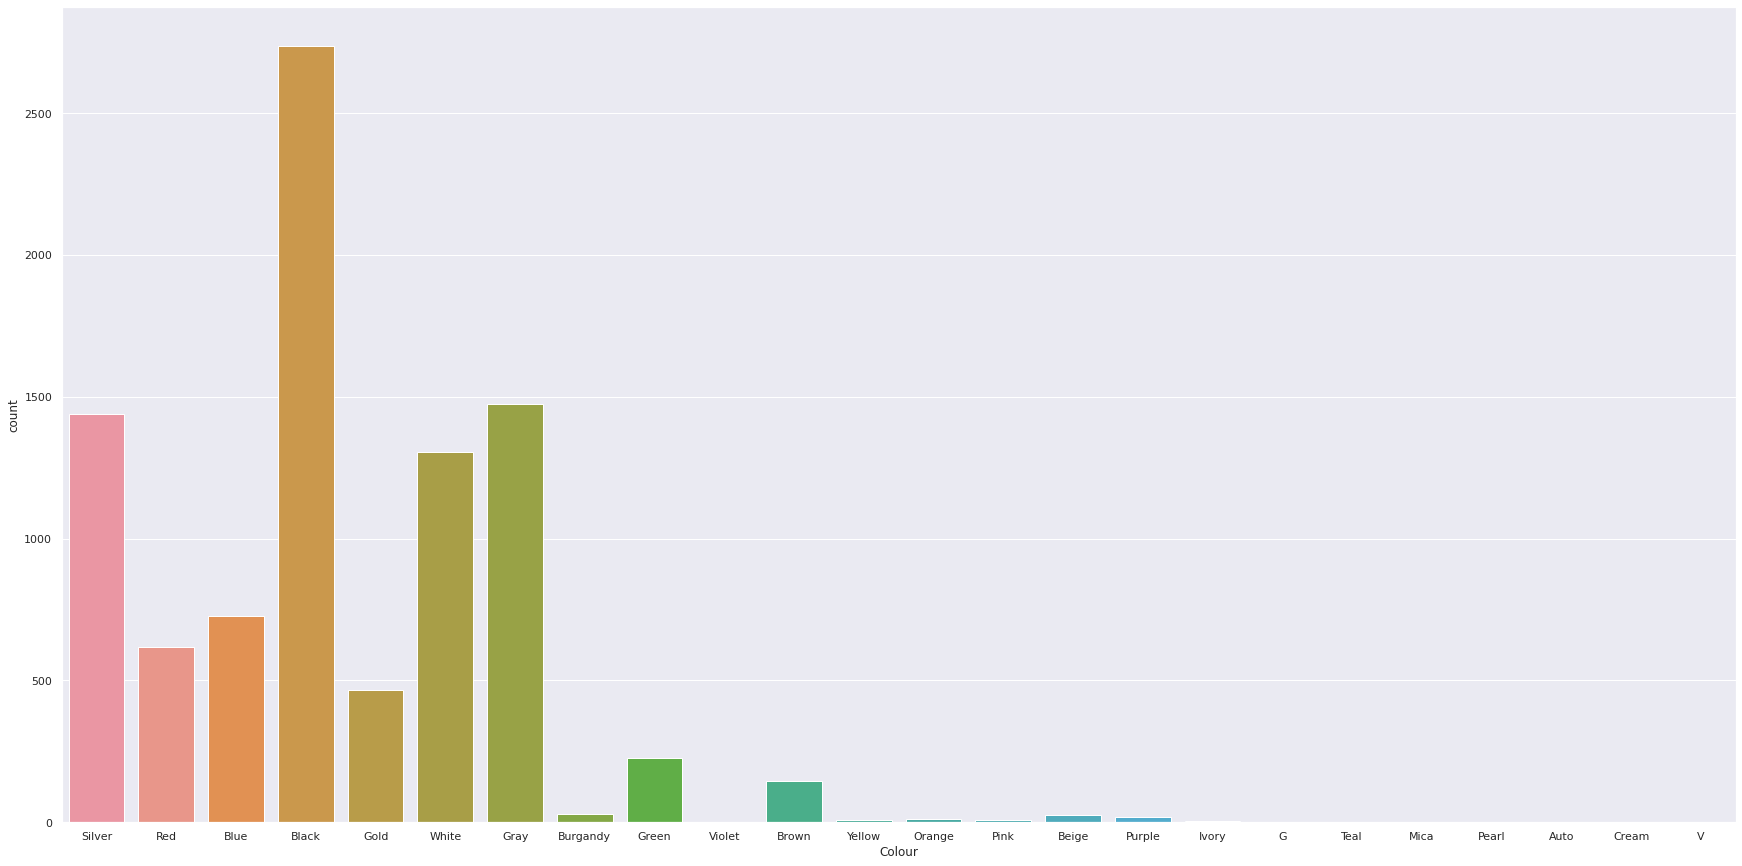

In [ ]:
fig, ax = plt.subplots(figsize=(30,15))
sns.countplot(x=data['Colour'])

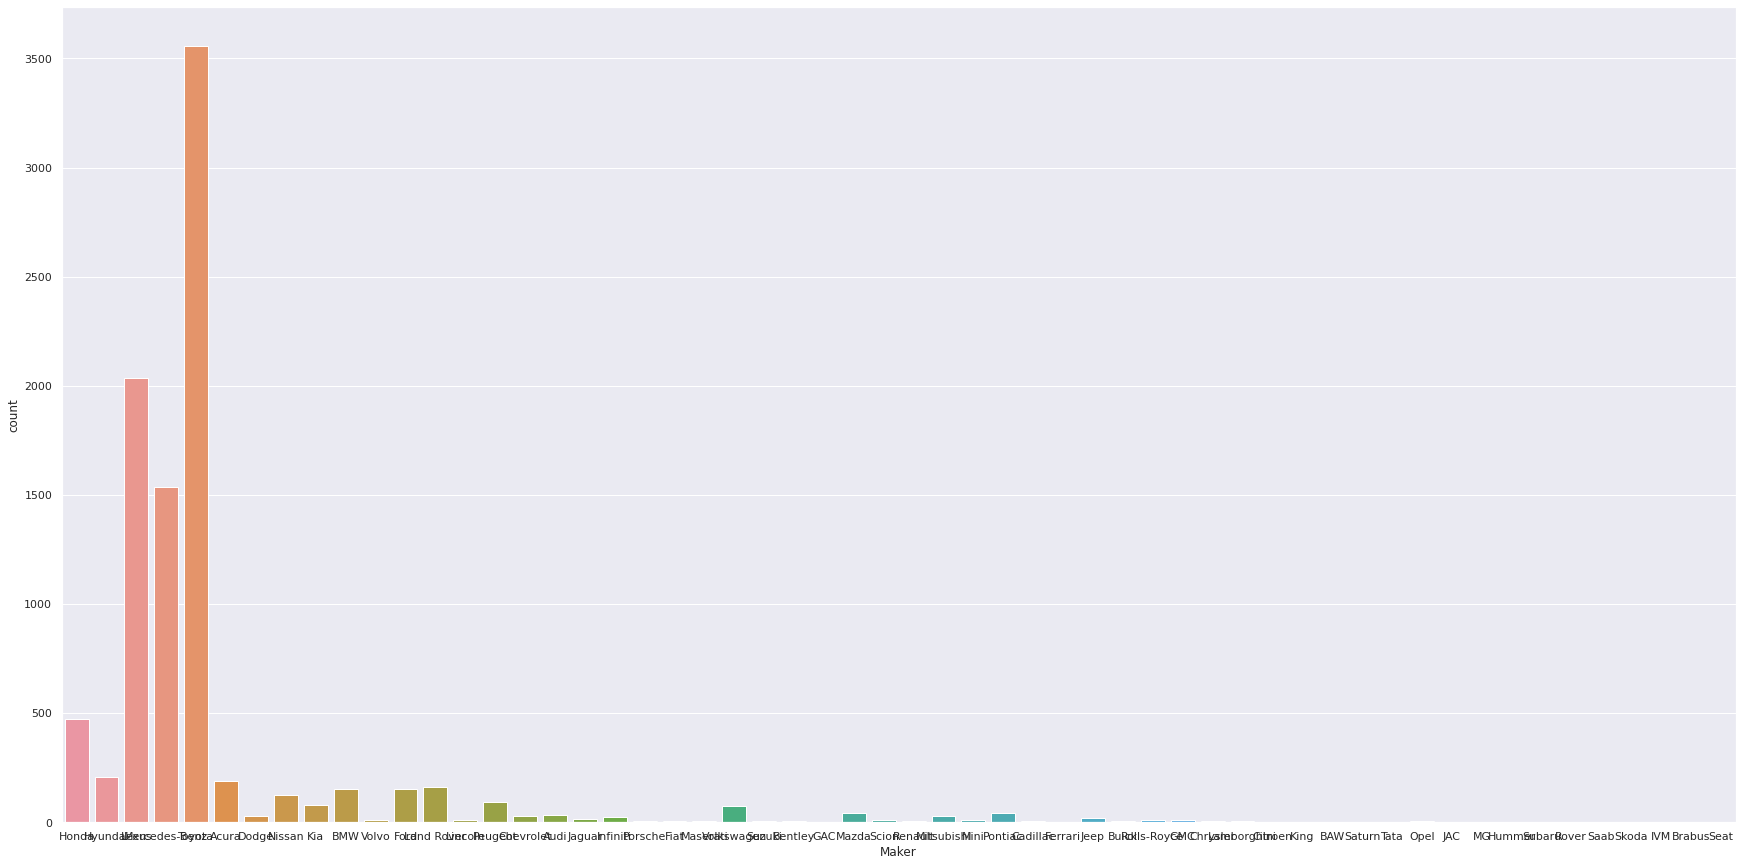

In [ ]:
fig, ax = plt.subplots(figsize=(30,15))
sns.countplot(x=data['Maker'])

###Feature Engineering

In [ ]:
data= data.drop(['VehicleID'],axis=1)

In [ ]:
cat_cols = data.select_dtypes(include=['object']).columns

In [ ]:
for col in cat_cols:
  print(col)
  print('='*30)
  print(data[col].value_counts())
  print('='*30)

Location
Lagos     4240
Abuja     4225
Ibadan     801
Name: Location, dtype: int64
Maker
Toyota           3558
Lexus            2036
Mercedes-Benz    1536
Honda             474
Hyundai           207
Acura             191
Land Rover        163
Ford              152
BMW               152
Nissan            125
Peugeot            95
Kia                79
Volkswagen         76
Mazda              44
Pontiac            42
Audi               33
Dodge              30
Mitsubishi         29
Chevrolet          28
Infiniti           23
Jeep               19
Jaguar             16
Mini               12
Lincoln            11
Rolls-Royce        11
GMC                 9
Scion               9
Volvo               9
Suzuki              8
Cadillac            8
Porsche             8
Maserati            7
Opel                7
Bentley             6
Chrysler            6
Buick               6
Lamborghini         5
Renault             4
Fiat                4
GAC                 3
Subaru              3
Rover    

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9266 entries, 0 to 9265
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                9266 non-null   object 
 1   Maker                   9266 non-null   object 
 2   Model                   9266 non-null   object 
 3   Year                    9266 non-null   float64
 4   Colour                  9266 non-null   object 
 5   Amount (Million Naira)  7205 non-null   float64
 6   Type                    9266 non-null   object 
 7   Distance                9266 non-null   float64
 8   tag                     9266 non-null   object 
dtypes: float64(3), object(6)
memory usage: 651.6+ KB


In [ ]:
data['Model_Year'] = data[['Year','Model']].apply(lambda x:x.Model+'_'+str(x.Year),axis=1)

In [ ]:
data['Maker'].value_counts().index

Index(['Toyota', 'Lexus', 'Mercedes-Benz', 'Honda', 'Hyundai', 'Acura',
       'Land Rover', 'Ford', 'BMW', 'Nissan', 'Peugeot', 'Kia', 'Volkswagen',
       'Mazda', 'Pontiac', 'Audi', 'Dodge', 'Mitsubishi', 'Chevrolet',
       'Infiniti', 'Jeep', 'Jaguar', 'Mini', 'Lincoln', 'Rolls-Royce', 'GMC',
       'Scion', 'Volvo', 'Suzuki', 'Cadillac', 'Porsche', 'Maserati', 'Opel',
       'Bentley', 'Chrysler', 'Buick', 'Lamborghini', 'Renault', 'Fiat', 'GAC',
       'Subaru', 'Rover', 'Citroen', 'Brabus', 'Saturn', 'JAC', 'Hummer',
       'Ferrari', 'Saab', 'IVM', 'Skoda', 'MG', 'Tata', 'BAW', 'King', 'Seat'],
      dtype='object')

In [ ]:
cols = ['Toyota', 'Lexus', 'Mercedes-Benz', 'Honda', 'Hyundai', 'Acura','Land Rover', 'Ford', 'BMW', 'Nissan', 'Peugeot']

In [ ]:
data['Ohe_Maker'] = np.where(data['Maker'].isin(cols), data['Maker'],'others')

In [ ]:
data['Distance_bin'] = pd.cut(data['Distance'],bins=10,labels=False)

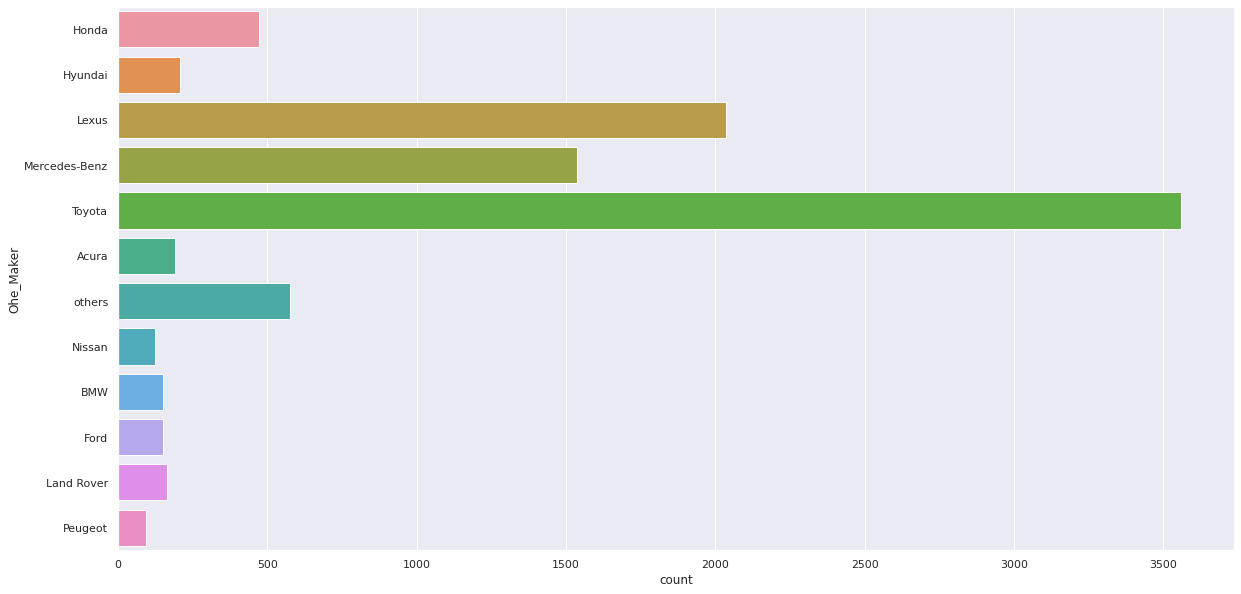

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(y='Ohe_Maker',data=data)

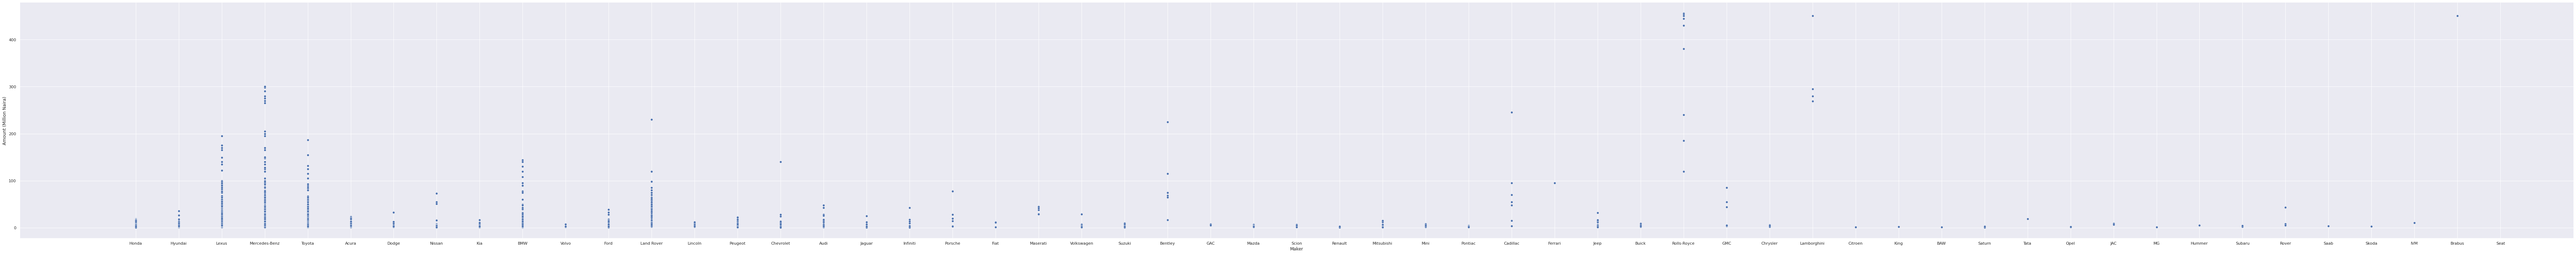

In [ ]:
sns.relplot(x='Maker',y='Amount (Million Naira)',data=data,height=10,aspect=10,kind='scatter')

How is it that Mercedes-Benz and Others are more expensive than others?

In [ ]:
data['Maker'].unique()

array(['Honda', 'Hyundai', 'Lexus', 'Mercedes-Benz', 'Toyota', 'Acura',
       'Dodge', 'Nissan', 'Kia', 'BMW', 'Volvo', 'Ford', 'Land Rover',
       'Lincoln', 'Peugeot', 'Chevrolet', 'Audi', 'Jaguar', 'Infiniti',
       'Porsche', 'Fiat', 'Maserati', 'Volkswagen', 'Suzuki', 'Bentley',
       'GAC', 'Mazda', 'Scion', 'Renault', 'Mitsubishi', 'Mini',
       'Pontiac', 'Cadillac', 'Ferrari', 'Jeep', 'Buick', 'Rolls-Royce',
       'GMC', 'Chrysler', 'Lamborghini', 'Citroen', 'King', 'BAW',
       'Saturn', 'Tata', 'Opel', 'JAC', 'MG', 'Hummer', 'Subaru', 'Rover',
       'Saab', 'Skoda', 'IVM', 'Brabus', 'Seat'], dtype=object)

In [ ]:
#costly_cars = ['Lexus','Mercedes-Benz','Toyota','Rolls-Royce','Lamborghini']
#cheap_cars = list(set(list(data['Maker'].unique())) - set(costly_cars))
# data['costly_cars'] = np.where(data['Maker'].isin(costly_cars), 1, 0)
# data['cheap_cars'] = np.where(data['Maker'].isin(cheap_cars),1,0)

In [ ]:
data['Model'].value_counts().index

Index(['Camry', 'ES 350', 'Corolla', 'C300', 'RX', 'Accord', 'RX 350',
       'Highlander', 'M Class ML 350 4Matic', 'RX 350 AWD',
       ...
       'Corolla XLE', 'Land Cruiser Prado 2.7 i', 'GLS-Class GLS550 4MATIC',
       'Accord Touring 2.0T', 'Infiniti QX', 'JAC S2', 'C-Max',
       'Accord CrossTour EX-L', 'C70 Automatic', 'Highlander Sport 4x4'],
      dtype='object', length=1412)

In [ ]:
# col_cols = ['Black', 'Gray', 'White', 'Blue', 'Red', 'Green','others']
# data['Ohe_Colour'] = np.where(data['Colour'].isin(col_cols), data['Colour'],'others')

In [ ]:
# fig, ax = plt.subplots(figsize=(20,10))
# sns.countplot(y='Ohe_Colour',hue='Type',data=data)

In [ ]:
# sns.relplot(x='Ohe_Colour',y='Amount (Million Naira)',hue='Type',data=data,height=10,aspect=10,kind='scatter')

In [ ]:
# mod_cols = ['Camry', 'ES 350', 'Corolla', 'C300', 'RX']

In [ ]:
# data['Ohe_Model'] = np.where(data['Model'].isin(mod_cols), data['Model'],'others')

In [ ]:
# fig, ax = plt.subplots(figsize=(20,10))
# sns.countplot(y='Ohe_Model',hue='Location',data=data)

In [ ]:
# sns.relplot(x='Ohe_Maker',y='Amount (Million Naira)',hue='Ohe_Colour',data=data,height=8,aspect=2,kind='scatter')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9266 entries, 0 to 9265
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                9266 non-null   object 
 1   Maker                   9266 non-null   object 
 2   Model                   9266 non-null   object 
 3   Year                    9266 non-null   float64
 4   Colour                  9266 non-null   object 
 5   Amount (Million Naira)  7205 non-null   float64
 6   Type                    9266 non-null   object 
 7   Distance                9266 non-null   float64
 8   tag                     9266 non-null   object 
 9   Model_Year              9266 non-null   object 
 10  Ohe_Maker               9266 non-null   object 
 11  Distance_bin            9266 non-null   int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 868.8+ KB


In [ ]:
new_data = data.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
le = LabelEncoder()
x = ohe.fit_transform(new_data[['Type']])
new_data[['Type_1','Type_2','Type_3']] = x

In [ ]:
x = ohe.fit_transform(new_data[['Location']])
new_data[['loc_1','loc_2','loc_3']] = x

In [ ]:
x = ohe.fit_transform(new_data[['Ohe_Maker']])
new_data[['Toyota', 'Lexus', 'Mercedes-Benz', 'Honda', 'Hyundai', 'Acura','Land Rover', 'Ford', 'BMW', 'Nissan', 'Peugeot','others']] = x

In [ ]:
# x = ohe.fit_transform(new_data[['Ohe_Model']])
# new_data[['Camry', 'ES 350', 'Corolla', 'C300', 'RX','others']] = x

In [ ]:
#x=ohe.fit_transform(new_data[['Ohe_colour']])
#new_data[['Black', 'Gray', 'White', 'Blue', 'Red', 'Green','others']] = x

In [ ]:
cols=['Maker','Model','Colour','Model_Year']
for col in cols:
  new_data[col] = le.fit_transform(new_data[col])

In [ ]:
Train = new_data.loc[new_data['tag'] == 'Train'].reset_index(drop = True)
Test = new_data.loc[new_data['tag'] == 'Test'].reset_index(drop = True)

Train.drop(['tag'],axis=1,inplace=True)
Test.drop(['tag'],axis=1,inplace=True)

new_train = Train.drop(['Location','Type','Ohe_Maker','Distance'],axis=1)
new_test = Test.drop(['Location','Type','Amount (Million Naira)','Ohe_Maker','Distance'],axis=1)

In [ ]:
!pip install catboost
from catboost import CatBoostRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###Modelling

In [ ]:
fold = KFold(n_splits=5,shuffle=True)
X = new_train.drop(['Amount (Million Naira)'],axis=1)
y = new_train['Amount (Million Naira)']
oof_f1=[]
feature_importances_cbc = np.zeros(X.shape[1])
cat_pred = []

for train_index, test_index in fold.split(X,y):
  X_train, X_test = X.iloc[train_index],X.iloc[test_index]
  y_train, y_test = y.iloc[train_index],y.iloc[test_index]

  model = CatBoostRegressor()
  model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=500, verbose = False)#erly100
  preds=model.predict(X_test)
  print("err: ",sqrt(mean_squared_error(y_test,preds)))
  oof_f1.append(sqrt(mean_squared_error(y_test,preds)))
  cat_pred.append(model.predict(new_test))
  feature_importances_cbc += model.feature_importances_
print(np.mean(oof_f1))



err:  13.119307415382556
err:  8.824765379056634
err:  10.037123856350744
err:  13.059849841223567
err:  11.575735070476854
11.32335631249807


In [ ]:
feature_importances_cbc = feature_importances_cbc / 5
feature_importances_cbc = pd.DataFrame({'feature': list(X.columns), 'importance': feature_importances_cbc}).sort_values('importance', ascending = False)

In [ ]:
zero_features = list(feature_importances_cbc[feature_importances_cbc['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances_cbc.head(100)

There are 0 features with 0.0 importance


,feature,importance
2,Year,28.111081
25,others,16.183591
1,Model,10.590736
8,Type_1,10.308853
4,Model_Year,8.006630
0,Maker,6.465052
7,cheap_cars,5.682721
21,Ford,4.866590
6,costly_cars,3.679599
3,Colour,2.162446


In [ ]:
fold = KFold(n_splits=5)
X = new_train.drop(['Amount (Million Naira)'],axis=1)
y = new_train['Amount (Million Naira)']
feature_importances_xgb = np.zeros(X.shape[1])
oof_f1=[]
xgb_pred = []

for train_index, test_index in fold.split(X,y):
  X_train, X_test = X.iloc[train_index],X.iloc[test_index]
  y_train, y_test = y.iloc[train_index],y.iloc[test_index]

  model = XGBRegressor()
  model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=500, verbose = False)#erly100
  preds=model.predict(X_test)
  print("err: ",sqrt(mean_squared_error(y_test,preds)))
  oof_f1.append(sqrt(mean_squared_error(y_test,preds)))
  p2 = model.predict(new_test)
  xgb_pred.append(p2)
  feature_importances_xgb += model.feature_importances_
print(np.mean(oof_f1))


[19:50:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
err:  7.705976225933854
[19:50:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
err:  10.969393742989558
[19:50:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
err:  8.482379281691363
[19:50:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
err:  12.991090040248041
[19:50:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
err:  16.45792158412969
11.3213521749985


In [ ]:
feature_importances_xgb = feature_importances_xgb / 5
feature_importances_xgb = pd.DataFrame({'feature': list(X.columns), 'importance': feature_importances_xgb}).sort_values('importance', ascending = False)

In [ ]:
zero_features = list(feature_importances_xgb[feature_importances_xgb['importance'] <= 0.000295]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances_xgb.head(100)

There are 9 features with 0.0 importance


,feature,importance
25,others,0.265809
8,Type_1,0.219499
2,Year,0.103472
11,loc_1,0.082709
6,costly_cars,0.079059
21,Ford,0.057863
4,Model_Year,0.050583
0,Maker,0.046839
1,Model,0.039073
3,Colour,0.014262


In [ ]:
fold = KFold(n_splits=10)
X = new_train.drop(['Amount (Million Naira)'],axis=1)
y = new_train['Amount (Million Naira)']
oof_f1=[]
feature_importances_cbc = np.zeros(X.shape[1])
cat_pred = []

for train_index, test_index in fold.split(X,y):
  X_train, X_test = X.iloc[train_index],X.iloc[test_index]
  y_train, y_test = y.iloc[train_index],y.iloc[test_index]

  model = CatBoostRegressor(depth=5,
                            l2_leaf_reg=2.0,
                            iterations=4500.0)
  model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=500, verbose = False)#erly100
  preds=model.predict(X_test)
  print("err: ",sqrt(mean_squared_error(y_test,preds)))
  oof_f1.append(sqrt(mean_squared_error(y_test,preds)))
  cat_pred.append(model.predict(new_test))
  feature_importances_cbc += model.feature_importances_
print(np.mean(oof_f1))



err:  7.780843798018394
err:  6.186317291614976
err:  7.806018277683767
err:  11.797072087373278
err:  5.433012489773638
err:  9.158756845066915
err:  10.229450182855242
err:  9.172266717497983
err:  10.652809919071139
err:  15.19179423699301
9.340834184594833


In [ ]:
cat_pred_1 = pd.DataFrame(cat_pred).T
#xgb_pred_1 = pd.DataFrame(xgb_pred).T
#all_pred = cat_pred_1.join(xgb_pred_1, lsuffix="_cat", rsuffix="_xgb")
#all_pred = 0.7 * cat_pred_1 + 0.3 * cat_pred_1
#all_pred

,0,1,2,3,4,5,6,7,8,9
0,3.700029,5.605295,5.115757,5.021294,3.905044,5.495278,4.836806,5.307996,3.231568,4.674725
1,6.112047,6.125547,6.069274,5.869435,5.855067,5.817040,5.836101,5.945028,5.817902,5.661343
2,4.385291,4.619083,4.543342,4.648103,4.318992,4.632190,4.789470,4.709482,4.553720,4.359575
3,4.796732,4.270860,4.416754,4.341441,4.636537,4.523829,4.357047,4.491304,4.536584,4.316267
4,8.700183,8.600874,7.995285,8.193338,8.870704,7.786456,8.369408,8.606388,8.673979,8.627567
...,...,...,...,...,...,...,...,...,...,...
2056,21.688399,19.793041,20.148560,18.779147,22.116523,19.723933,19.713208,19.550244,25.241788,21.598444
2057,8.421729,6.949464,7.734355,6.413695,8.841052,7.166755,7.430460,7.561738,10.716947,7.151666
2058,6.612856,6.914739,7.318338,7.495844,6.090561,7.197180,7.029785,7.132866,6.371129,7.193315
2059,10.334214,11.620299,10.959064,10.855567,10.353183,10.589581,11.172661,11.238995,9.262320,10.622720


In [ ]:
mean_pred = cat_pred_1.mean(axis=1)
mean_pred

0        4.689379
1        5.910878
2        4.555925
3        4.468736
4        8.442418
          ...    
2056    20.835329
2057     7.838786
2058     6.935661
2059    10.700860
2060     4.899035
Length: 2061, dtype: float64

In [ ]:
SampleSub['Amount (Million Naira)'] = mean_pred

In [ ]:
SampleSub.to_csv('SampleSubmission catboost7_ensemble1.csv',index=False)